# Analysis: All Accounts in Last 12 Months

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().magic(u'config IPCompleter.greedy=True')

sns.set(color_codes=True)

## 1. Import Data

In [ ]:
# Import CSV file for final features for different periods
df_final_features_day_7  = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_14 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_21 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_28 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_35 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_42 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_49 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_56 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_63 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_70 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_77 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_84 = pd.read_csv("final_features_day_7.tsv", sep="\t")
df_final_features_day_91 = pd.read_csv("final_features_day_7.tsv", sep="\t")



In [2]:
################################## Import Periodic Invoice Word Counts Data ###############################
df_periodic_invoice_all_counts = pd.read_csv("", sep="\t")

In [36]:
df_periodic_invoice_all_counts.shape

(438766, 91)

In [4]:
########################################### Import Fraud Data ##############################################
df_fraud_accounts_list = pd.read_csv(" ", sep="\t")

In [6]:
# Drop unnecessay columns from the 
df_fraud_accounts_list = df_fraud_accounts_list.drop(columns=['is_account_active', 'is_sales_managed', 'signup_date', 'status_date', 'notes'], axis=1)

In [ ]:
# Drop two columns
# df_fraud_accounts_list = df_fraud_accounts_list.drop(['is_account_active', 'is_sales_managed'], axis=1)

## 2. Excluding all fraud accounts activities

In [8]:
# Periodic invoice activities excluding identified fraud accounts
df_merge_all_and_fraud = df_periodic_invoice_all_counts.merge(df_fraud_accounts_list,
                                                             on='systemid', how='left', indicator=True)

# Drop all fraud accounts from the merge dataframe
df_periodic_invoice_all_count_no_fraud = df_merge_all_and_fraud[df_merge_all_and_fraud["_merge"] == "left_only"].drop(columns=["_merge"])

## 2. Separating outliers and inactive accounts

### 2.1 Removing inactive account (except systemid all of the columns entries are zero)

In [32]:
# Function for aggregating selected column values
def cell_value_sum (row, ex_cols_list):
    #print(row)
    sum = 0
    cols = range(len(row))
    new_cols = list(set(cols) - set(ex_cols_list))
    #print(new_cols)
    
    for i in new_cols:
        #print(row[i])
        sum =+ row[i]
    
    #print('Final sum: ', sum)
    return sum
    

In [33]:
# Removing all inactive acounts (ie. all entries are zeros except 'systemid', 'is_fb_active', 'is_sales_manage')
ex_cols_list = [0, 1, 2, 55, 56, 57, 58, 59, 60, 61, 62]
df_periodic_invoice_all_count_no_fraud = df_periodic_invoice_all_count_no_fraud[
    df_periodic_invoice_all_count_no_fraud.apply(lambda x: cell_value_sum(x, ex_cols_list) > 0, axis=1)]

## 3. Analysis: Invoice and Client Counts

### 3.1 Invoice vs. Client Plot (Before Removing Outliers)

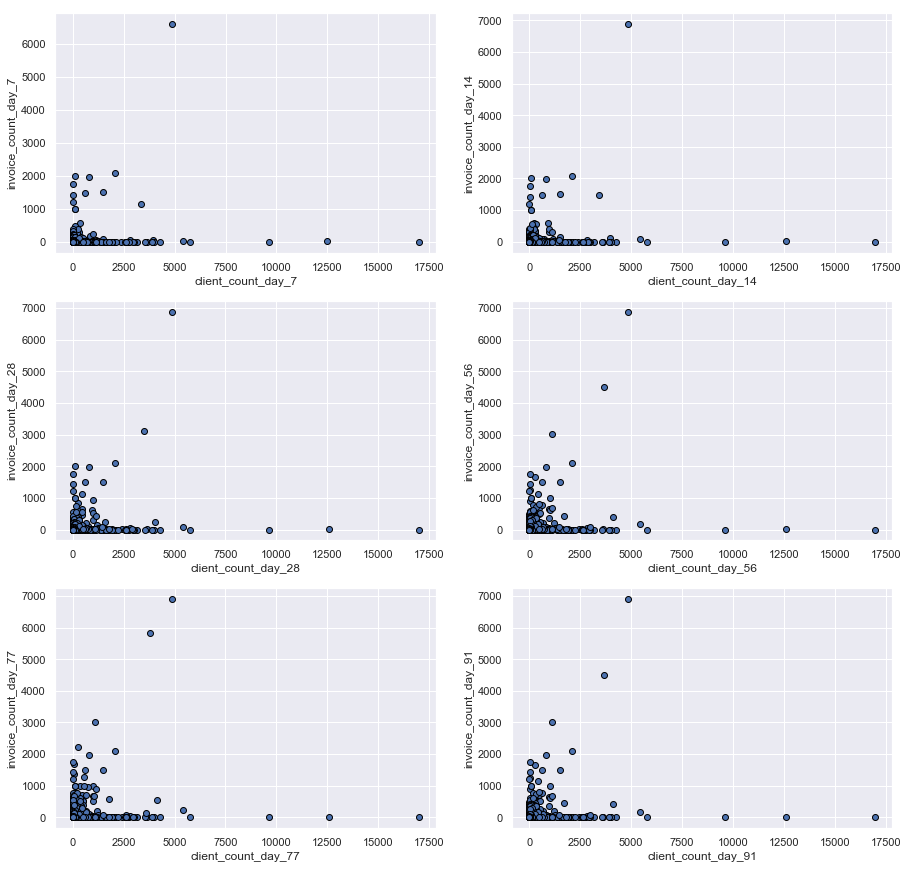

In [39]:
# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax7, ax14, ax28, ax56, ax77, ax91 = axes.flatten()

#------------------------------------------------------
x7 = df_periodic_invoice_all_count_no_fraud['client_count_day_7']
y7 = df_periodic_invoice_all_count_no_fraud['invoice_count_day_7']

ax7.scatter(x7, y7, edgecolors=(0, 0, 0))
ax7.set_xlabel('client_count_day_7')
ax7.set_ylabel('invoice_count_day_7')


#------------------------------------------------------
x14 = df_periodic_invoice_all_count_no_fraud['client_count_day_14']
y14 = df_periodic_invoice_all_count_no_fraud['invoice_count_day_14']

ax14.scatter(x14, y14, edgecolors=(0, 0, 0))
ax14.set_xlabel('client_count_day_14')
ax14.set_ylabel('invoice_count_day_14')


# ------------------------------------------------------
x28 = df_periodic_invoice_all_count_no_fraud['client_count_day_28']
y28 = df_periodic_invoice_all_count_no_fraud['invoice_count_day_28']

ax28.scatter(x28, y28, edgecolors=(0, 0, 0))
ax28.set_xlabel('client_count_day_28')
ax28.set_ylabel('invoice_count_day_28')

# ------------------------------------------------------
x56 = df_periodic_invoice_all_count_no_fraud['client_count_day_56']
y56 = df_periodic_invoice_all_count_no_fraud['invoice_count_day_56']

ax56.scatter(x56, y56, edgecolors=(0, 0, 0))
ax56.set_xlabel('client_count_day_56')
ax56.set_ylabel('invoice_count_day_56')

# ------------------------------------------------------
x77 = df_periodic_invoice_all_count_no_fraud['client_count_day_77']
y77 = df_periodic_invoice_all_count_no_fraud['invoice_count_day_77']

ax77.scatter(x77, y77, edgecolors=(0, 0, 0))
ax77.set_xlabel('client_count_day_77')
ax77.set_ylabel('invoice_count_day_77')

# ------------------------------------------------------
x91 = df_periodic_invoice_all_count_no_fraud['client_count_day_91']
y91 = df_periodic_invoice_all_count_no_fraud['invoice_count_day_91']

ax91.scatter(x56, y56, edgecolors=(0, 0, 0))
ax91.set_xlabel('client_count_day_91')
ax91.set_ylabel('invoice_count_day_91')

plt.show()

### 3.2 Check the summary statistics

We can notice in `avg_we_description_day_7` column that the mean is `4.048`, and max is `1797`. There are some outliers driving the max up!

### 3.3 Detemine and separation of outliers

#### 3.3.1 Determine the client outliers cutoff

In [41]:
# Determine the outliers cutoff (iterative process)
outliers_client_cutoff = 200
df_sorted = sorted(df_periodic_invoice_all_count_no_fraud['client_count_day_91'])
no_outliers = [i for i in df_sorted if i <= outliers_client_cutoff]
outliers = [i for i in df_sorted if i > outliers_client_cutoff]

#### 3.3.2 Determine the invoice outliers cutoff

In [44]:
# Determine the outliers cutoff (iterative process)
outliers_invoice_cutoff = 250
df_sorted = sorted(df_periodic_invoice_all_count_no_fraud['invoice_count_day_91'])
no_outliers = [i for i in df_sorted if i <= outliers_invoice_cutoff]
outliers = [i for i in df_sorted if i > outliers_invoice_cutoff]

#### 3.3.3 Sepatating dataframes based on both invoice and client outliers cutoffs

In [47]:
# No client and invoice outliers dataframe
df_periodic_invoice_no_client_outliers = df_periodic_invoice_all_count_no_fraud[
                            df_periodic_invoice_all_count_no_fraud['client_count_day_91'].astype(int) <= outliers_client_cutoff]

df_periodic_invoice_no_client_invoice_outliers = df_periodic_invoice_no_client_outliers[
                            df_periodic_invoice_no_client_outliers['invoice_count_day_91'].astype(int) <= outliers_invoice_cutoff]


In [50]:
# Outliers 
df_merge_all = df_periodic_invoice_all_count_no_fraud.merge(df_periodic_invoice_no_client_invoice_outliers['systemid'],
                                                             on='systemid', how='left', indicator=True)

df_periodic_invoice_outliers = df_merge_all[df_merge_all["_merge"] == "left_only"].drop(columns=["_merge"])

In [53]:
# CSV export of the invoice outliers list
df_periodic_invoice_outliers.to_csv(" ", sep="\t", index=False)

#### 3.3.4 Invoice vs. client plot: No Client and Invoice outliers (after sepateing both outliers)

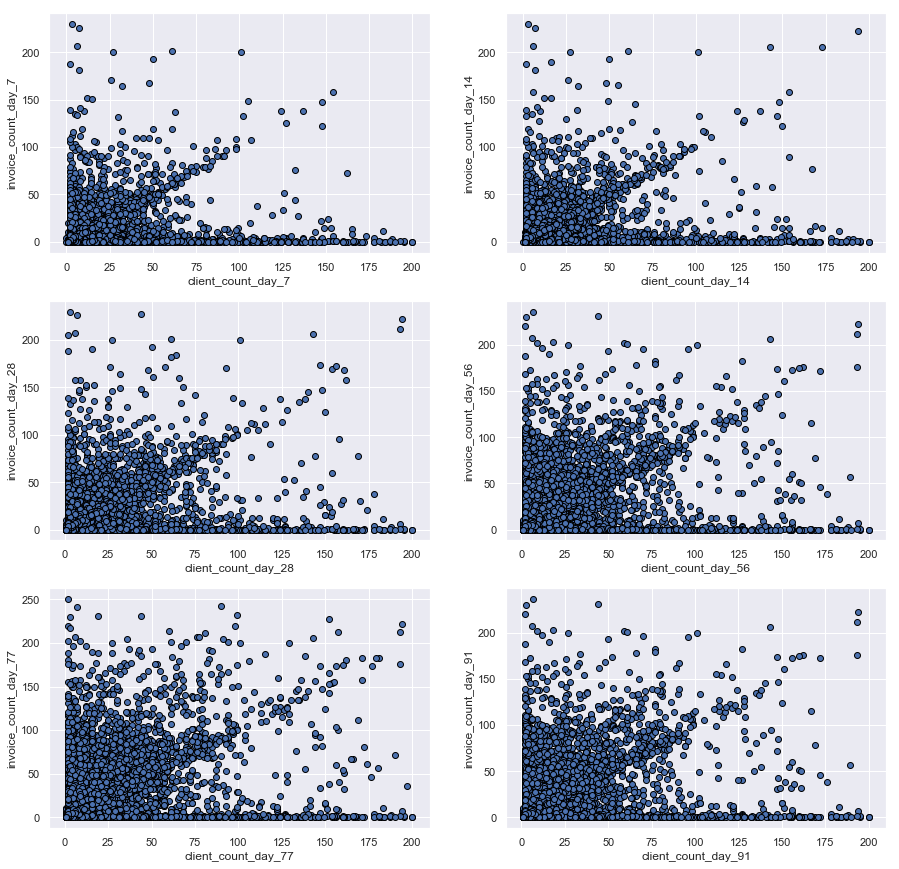

In [54]:
# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax7, ax14, ax28, ax56, ax77, ax91 = axes.flatten()

#------------------------------------------------------
x7 = df_periodic_invoice_no_client_invoice_outliers['client_count_day_7']
y7 = df_periodic_invoice_no_client_invoice_outliers['invoice_count_day_7']

ax7.scatter(x7, y7, edgecolors=(0, 0, 0))
ax7.set_xlabel('client_count_day_7')
ax7.set_ylabel('invoice_count_day_7')


#------------------------------------------------------
x14 = df_periodic_invoice_no_client_invoice_outliers['client_count_day_14']
y14 = df_periodic_invoice_no_client_invoice_outliers['invoice_count_day_14']

ax14.scatter(x14, y14, edgecolors=(0, 0, 0))
ax14.set_xlabel('client_count_day_14')
ax14.set_ylabel('invoice_count_day_14')


# ------------------------------------------------------
x28 = df_periodic_invoice_no_client_invoice_outliers['client_count_day_28']
y28 = df_periodic_invoice_no_client_invoice_outliers['invoice_count_day_28']

ax28.scatter(x28, y28, edgecolors=(0, 0, 0))
ax28.set_xlabel('client_count_day_28')
ax28.set_ylabel('invoice_count_day_28')

# ------------------------------------------------------
x56 = df_periodic_invoice_no_client_invoice_outliers['client_count_day_56']
y56 = df_periodic_invoice_no_client_invoice_outliers['invoice_count_day_56']

ax56.scatter(x56, y56, edgecolors=(0, 0, 0))
ax56.set_xlabel('client_count_day_56')
ax56.set_ylabel('invoice_count_day_56')

# ------------------------------------------------------
x77 = df_periodic_invoice_no_client_invoice_outliers['client_count_day_77']
y77 = df_periodic_invoice_no_client_invoice_outliers['invoice_count_day_77']

ax77.scatter(x77, y77, edgecolors=(0, 0, 0))
ax77.set_xlabel('client_count_day_77')
ax77.set_ylabel('invoice_count_day_77')

# ------------------------------------------------------
x91 = df_periodic_invoice_no_client_invoice_outliers['client_count_day_91']
y91 = df_periodic_invoice_no_client_invoice_outliers['invoice_count_day_91']

ax91.scatter(x56, y56, edgecolors=(0, 0, 0))
ax91.set_xlabel('client_count_day_91')
ax91.set_ylabel('invoice_count_day_91')

plt.show()

#### 3.3.5 Invoice vs. client plot: Client and Invoice outliers (after sepateing invoice outliers)

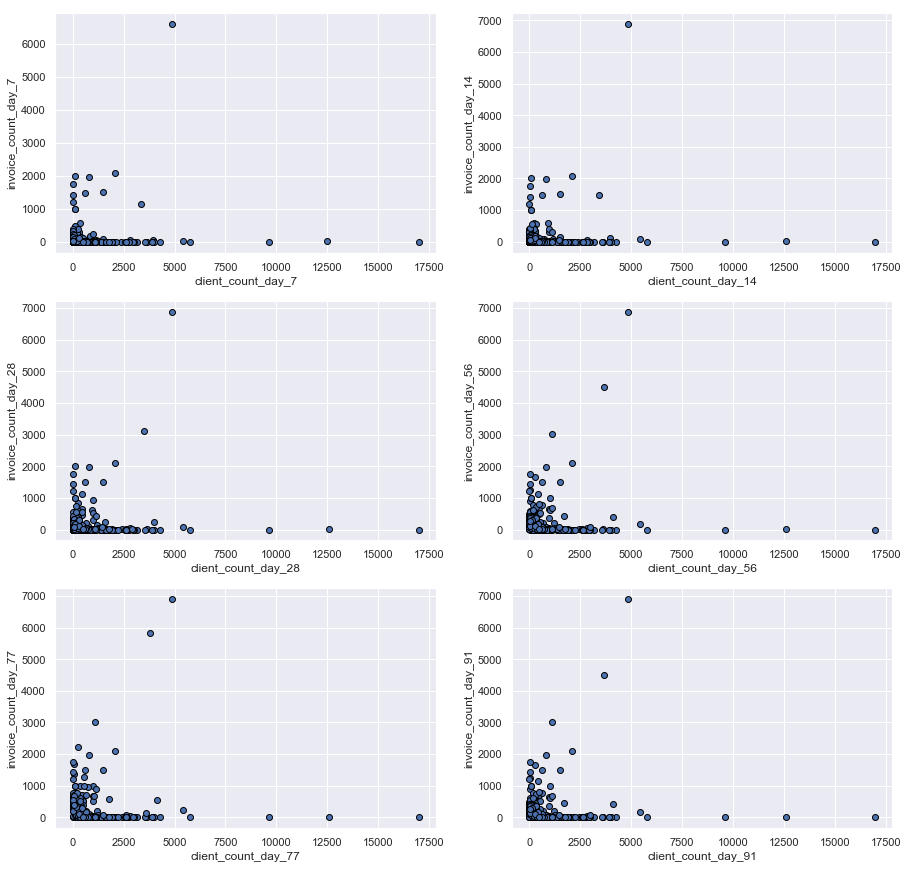

In [55]:
# Pair-to-pair cross-validation plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax7, ax14, ax28, ax56, ax77, ax91 = axes.flatten()

#------------------------------------------------------
x7 = df_periodic_invoice_outliers['client_count_day_7']
y7 = df_periodic_invoice_outliers['invoice_count_day_7']

ax7.scatter(x7, y7, edgecolors=(0, 0, 0))
ax7.set_xlabel('client_count_day_7')
ax7.set_ylabel('invoice_count_day_7')


#------------------------------------------------------
x14 = df_periodic_invoice_outliers['client_count_day_14']
y14 = df_periodic_invoice_outliers['invoice_count_day_14']

ax14.scatter(x14, y14, edgecolors=(0, 0, 0))
ax14.set_xlabel('client_count_day_14')
ax14.set_ylabel('invoice_count_day_14')


# ------------------------------------------------------
x28 = df_periodic_invoice_outliers['client_count_day_28']
y28 = df_periodic_invoice_outliers['invoice_count_day_28']

ax28.scatter(x28, y28, edgecolors=(0, 0, 0))
ax28.set_xlabel('client_count_day_28')
ax28.set_ylabel('invoice_count_day_28')

# ------------------------------------------------------
x56 = df_periodic_invoice_outliers['client_count_day_56']
y56 = df_periodic_invoice_outliers['invoice_count_day_56']

ax56.scatter(x56, y56, edgecolors=(0, 0, 0))
ax56.set_xlabel('client_count_day_56')
ax56.set_ylabel('invoice_count_day_56')

# ------------------------------------------------------
x77 = df_periodic_invoice_outliers['client_count_day_77']
y77 = df_periodic_invoice_outliers['invoice_count_day_77']

ax77.scatter(x77, y77, edgecolors=(0, 0, 0))
ax77.set_xlabel('client_count_day_77')
ax77.set_ylabel('invoice_count_day_77')

# ------------------------------------------------------
x91 = df_periodic_invoice_outliers['client_count_day_91']
y91 = df_periodic_invoice_outliers['invoice_count_day_91']

ax91.scatter(x56, y56, edgecolors=(0, 0, 0))
ax91.set_xlabel('client_count_day_91')
ax91.set_ylabel('invoice_count_day_91')

plt.show()

## 4. Analysis: Separated Periodic Features

In [56]:
# Periodic client count
df_periodic_client_counts_no_outliers = df_periodic_invoice_no_client_invoice_outliers[['systemid',
                                                         'client_count_day_7',
                                                         'client_count_day_14',
                                                         'client_count_day_21',
                                                         'client_count_day_28',
                                                         'client_count_day_35',
                                                         'client_count_day_42',
                                                         'client_count_day_49',
                                                         'client_count_day_56',
                                                         'client_count_day_63',
                                                         'client_count_day_70',
                                                         'client_count_day_77',
                                                         'client_count_day_84',
                                                         'client_count_day_91']]

In [57]:
# Periodic invoice count
df_periodic_invoice_counts_no_outliers = df_periodic_invoice_no_client_invoice_outliers[['systemid',
                                                         'invoice_count_day_7',
                                                         'invoice_count_day_14',
                                                         'invoice_count_day_21',
                                                         'invoice_count_day_28',
                                                         'invoice_count_day_35',
                                                         'invoice_count_day_42',
                                                         'invoice_count_day_49',
                                                         'invoice_count_day_56',
                                                         'invoice_count_day_63',
                                                         'invoice_count_day_70',
                                                         'invoice_count_day_77',
                                                         'invoice_count_day_84',
                                                         'invoice_count_day_91']]

In [58]:
# Periodic average word count in invoice description
df_periodic_invoice_avg_wc_description_no_outliers = df_periodic_invoice_no_client_invoice_outliers[['systemid',
                                                        'avg_wc_description_day_7',
                                                        'avg_wc_description_day_14',
                                                        'avg_wc_description_day_21',
                                                        'avg_wc_description_day_28',
                                                        'avg_wc_description_day_35',
                                                        'avg_wc_description_day_42',
                                                        'avg_wc_description_day_49',
                                                        'avg_wc_description_day_56',
                                                        'avg_wc_description_day_63',
                                                        'avg_wc_description_day_70',
                                                        'avg_wc_description_day_77',
                                                        'avg_wc_description_day_84',
                                                        'avg_wc_description_day_91']]

In [59]:
# Periodic average word count in invoice notes
df_periodic_invoice_avg_wc_notes_no_outliers = df_periodic_invoice_no_client_invoice_outliers[['systemid',
                                                        'avg_wc_notes_day_7',
                                                        'avg_wc_notes_day_14',
                                                        'avg_wc_notes_day_21',
                                                        'avg_wc_notes_day_28',
                                                        'avg_wc_notes_day_35',
                                                        'avg_wc_notes_day_42',
                                                        'avg_wc_notes_day_49',
                                                        'avg_wc_notes_day_56',
                                                        'avg_wc_notes_day_63',
                                                        'avg_wc_notes_day_70',
                                                        'avg_wc_notes_day_77',
                                                        'avg_wc_notes_day_84',
                                                        'avg_wc_notes_day_91']]

In [60]:
# Periodic average word count in invoice terms
df_periodic_invoice_avg_wc_terms_no_outliers = df_periodic_invoice_no_client_invoice_outliers[['systemid',
                                                        'avg_wc_terms_day_7',
                                                        'avg_wc_terms_day_14',
                                                        'avg_wc_terms_day_21',
                                                        'avg_wc_terms_day_28',
                                                        'avg_wc_terms_day_35',
                                                        'avg_wc_terms_day_42',
                                                        'avg_wc_terms_day_49',
                                                        'avg_wc_terms_day_56',
                                                        'avg_wc_terms_day_63',
                                                        'avg_wc_terms_day_70',
                                                        'avg_wc_terms_day_77',
                                                        'avg_wc_terms_day_84',
                                                        'avg_wc_terms_day_91']]

In [61]:
# Periodic average word count in invoice address
df_periodic_invoice_avg_wc_address_no_outliers = df_periodic_invoice_no_client_invoice_outliers[['systemid',
                                                        'avg_wc_address_day_7',
                                                        'avg_wc_address_day_14',
                                                        'avg_wc_address_day_21',
                                                        'avg_wc_address_day_28',
                                                        'avg_wc_address_day_35',
                                                        'avg_wc_address_day_42',
                                                        'avg_wc_address_day_49',
                                                        'avg_wc_address_day_56',
                                                        'avg_wc_address_day_63',
                                                        'avg_wc_address_day_70',
                                                        'avg_wc_address_day_77',
                                                        'avg_wc_address_day_84',
                                                        'avg_wc_address_day_91']]